<a href="https://colab.research.google.com/github/VangatiManikanthReddy/PhishingEmailDetectionUsingLLM/blob/testbranch/deepseeek_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment setup

In [ ]:
# 📦 Importing all required libraries

import pandas as pd  # To handle dataframes and read/write Excel and CSV files
import os  # For working with file and folder paths
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For evaluation metrics
import matplotlib.pyplot as plt  # For plotting charts like confusion matrix
import seaborn as sns  # For nicer/confident heatmaps of the confusion matrix


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U gdown

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1rw2QC7mwvBHMaPmPb_wRum6luX_oUfxv -O GroundTruthTable --quiet

In [ ]:
# Locating the file in the drive
import os

def find_folder_path(folder_name, base_path='/content/'):
    for root, dirs, files in os.walk(base_path):
        if folder_name in dirs:
            return os.path.join(root, folder_name)
    return None




In [ ]:
# Printing the path of the file
folder_name_to_search = '04 Manikanth and Anjireddy'
# path = find_folder_path(folder_name_to_search)
path = "/content/drive/MyDrive/002 SP 25 Project/04 Manikanth and Anjireddy"
print(path)

/content/drive/MyDrive/002 SP 25 Project/04 Manikanth and Anjireddy


# Load Ground Truth and Prediction Data

In [ ]:
# Function to load ground truth and prediction data from Excel files

def load_data(true_path, pred_path, id_col='id'):
    """
    Loads ground truth and prediction files.
    Optionally aligns rows based on a unique identifier (email ID).
    """

    # Read ground truth Excel file into a pandas DataFrame
    df_true = pd.read_excel(true_path)

    # Read prediction Excel file into a pandas DataFrame
    df_pred = pd.read_excel(pred_path)

    # If both files have a common ID column, align rows to match exactly
    if id_col in df_true.columns and id_col in df_pred.columns:
        df_true = df_true.sort_values(by=id_col).reset_index(drop=True)
        df_pred = df_pred.sort_values(by=id_col).reset_index(drop=True)

    # Return the aligned DataFrames
    return df_true, df_pred


# Evaluate Predictions and Plot Confusion Matrix

In [ ]:
#  Function to evaluate predictions using common classification metrics

def evaluate_predictions(df_true, df_pred, true_col, pred_col, title):
    """
    Computes classification metrics and shows a confusion matrix heatmap.
    """

    # Extract true labels from the ground truth DataFrame
    y_true = df_true[true_col].astype(int)

    # Extract predicted labels from the predictions DataFrame
    y_pred = df_pred[pred_col].astype(int)

    # Compute classification metrics
    accuracy = accuracy_score(y_true, y_pred)      # Overall accuracy
    precision = precision_score(y_true, y_pred)    # TP / (TP + FP)
    recall = recall_score(y_true, y_pred)          # TP / (TP + FN)
    f1 = f1_score(y_true, y_pred)                  # Harmonic mean of precision and recall

    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create and display heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Phishing'],  # Predicted labels
                yticklabels=['Legitimate', 'Phishing'])  # True labels
    plt.xlabel("Predicted")  # X-axis label
    plt.ylabel("Actual")     # Y-axis label
    plt.title(f"Confusion Matrix - {title}")  # Title of the heatmap
    plt.show()

    # Return metrics as a dictionary for table storage
    return {
        "Prompt/Input": title,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    }


# Set Up File Paths and Storage

In [ ]:
# 🧾 Setup: Define paths to all files and initialize result storage

all_results = []  # List to store evaluation results from all configurations

# Base path to ground truth Excel files
ground_truth_base = "/content/GroundTruthTable"
groundtruthCombined = pd.read_excel(os.path.join(ground_truth_base, "combined_ground_truth.xlsx"))
groundtruthHeader= pd.read_excel(os.path.join(ground_truth_base, "header_ground_truth.xlsx"))
groundtruthBody= pd.read_excel(os.path.join(ground_truth_base, "body_ground_truth.xlsx"))


# Base folder that contains zeroshot, fewshot, and cot prediction folders
predictions_base_root = os.path.join(path,'001 Submission','All APIs', 'deepseek_llm','output_daata')

# Mapping of each input type to its corresponding ground truth Excel file
ground_truth_files = {
    "header": "header_ground_truth.xlsx",
    "body": "body_ground_truth.xlsx",
    "header_and_body": "combined_ground_truth.xlsx"
}

# Mapping of each prompt type (zeroshot, fewshot, cot) to folder + prediction filenames
prediction_files = {
    "zero_shot": {
        "folder": "zeroshot",  # Subfolder name in Drive
        "files": {
            "header": "header_sample_75_without_label_predicted.xlsx",
            "body": "body_sample_75_without_label_predicted.xlsx",
            "header_and_body": "header_body_sample_75_without_label_predicted.xlsx"
        }
    },
    "few_shot": {
        "folder": "fewshot",
        "files": {
            "header": "header_sample_75_without_label_fewshot_predicted.xlsx",
            "body": "body_sample_75_without_label_fewshot_predicted.xlsx",
            "header_and_body": "header_body_sample_75_without_label_fewshot_predicted.xlsx"
        }
    },
    "cot": {
        "folder": "chainofthought",
        "files": {
            "header": "header_sample_75_without_label_cot_predicted.xlsx",
            "body": "body_sample_75_without_label_cot_predicted.xlsx",
            "header_and_body": "header_body_sample_75_without_label_cot_predicted.xlsx"
        }
    }
}


In [ ]:
groundtruthCombined.head(5)

,sender,receiver,date,subject,body,label
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1


In [ ]:
groundtruthBody.head(5)

,body,label
0,"Buck up, your troubles caused by small dimensi...",1
1,\nUpgrade your sex and pleasures with these te...,1
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1
3,Would anyone object to removing .so from this ...,0
4,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1


In [ ]:
groundtruthHeader.head(5)

,sender,receiver,date,subject,label
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,0
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,1


# Evaluate All Prompt/Input Combinations

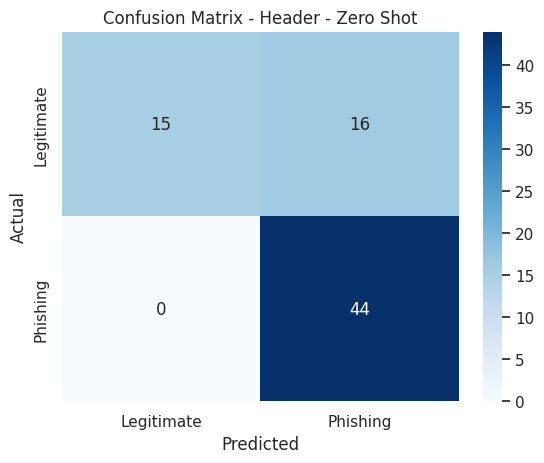

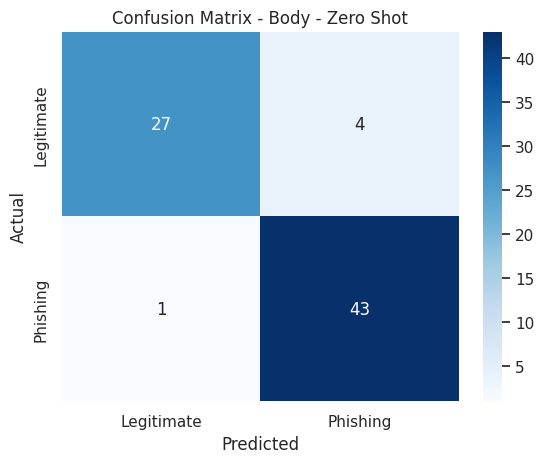

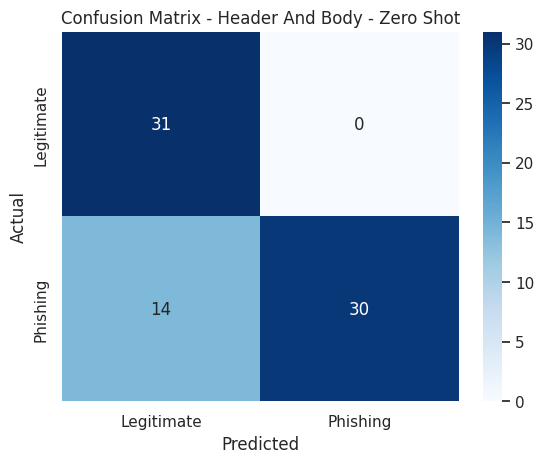

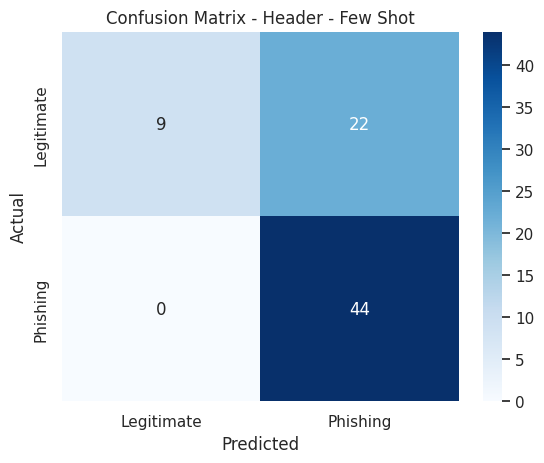

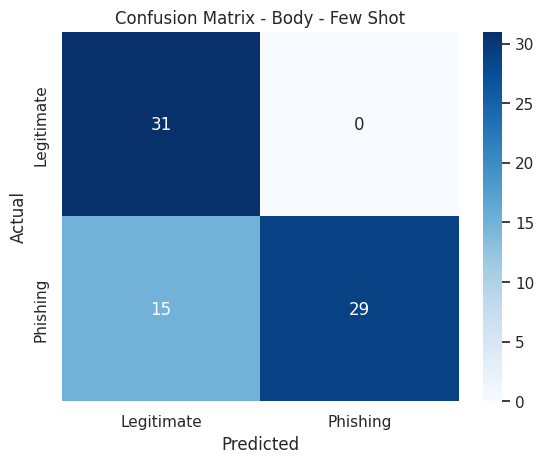

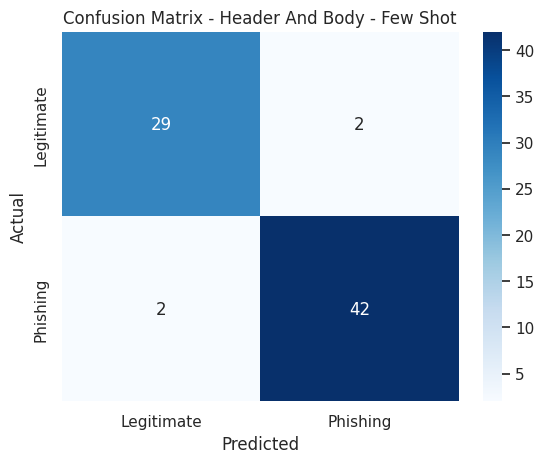

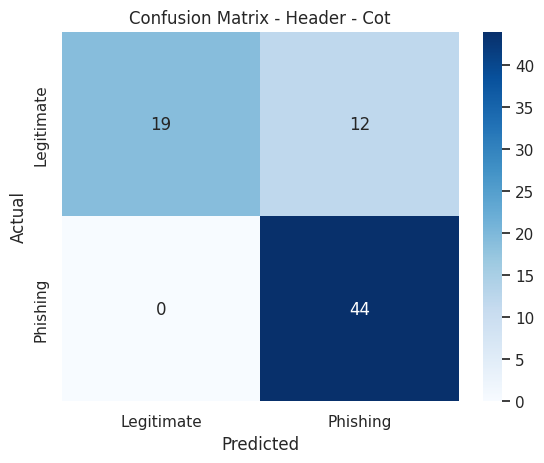

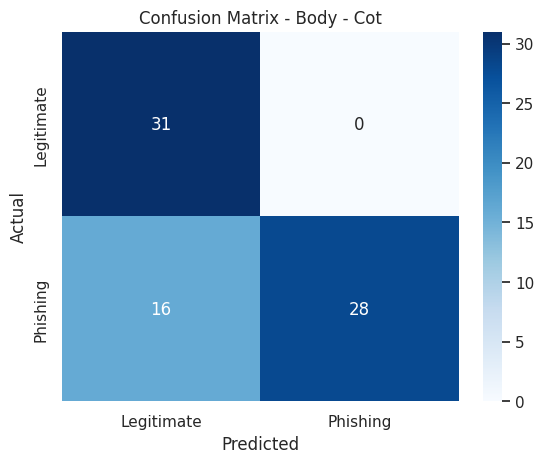

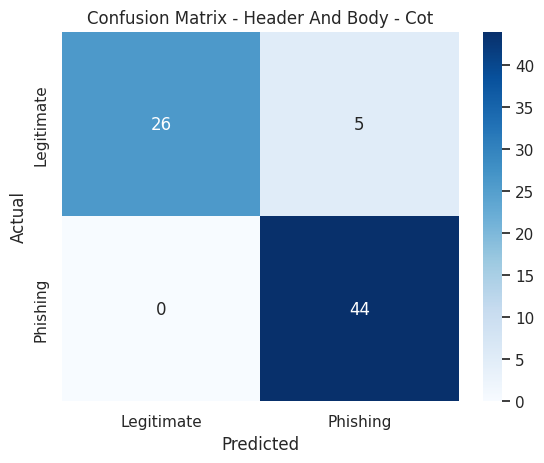

In [ ]:
# 🔁 Loop through each prompt (zero_shot, few_shot, cot) and each input type (header, body, combined)

for prompt_type, prompt_data in prediction_files.items():
    prompt_folder = os.path.join(predictions_base_root, prompt_data["folder"])  # Full path to prediction folder

    for input_type, pred_filename in prompt_data["files"].items():
        # Create title for printing/plotting (e.g., "Header - Zero Shot")
        title = f"{input_type.replace('_', ' ').title()} - {prompt_type.replace('_', ' ').title()}"

        # Full file paths for ground truth and prediction files
        true_path = os.path.join(ground_truth_base, ground_truth_files[input_type])
        pred_path = os.path.join(prompt_folder, pred_filename)

        # Check if both files exist before proceeding
        if os.path.exists(true_path) and os.path.exists(pred_path):
            # Load files
            df_true, df_pred = load_data(true_path, pred_path)

            # Evaluate and collect results
            metrics = evaluate_predictions(df_true, df_pred, true_col="label", pred_col="prediction_label", title=title)
            all_results.append(metrics)
        else:
            print(f"❌ File missing: {true_path if not os.path.exists(true_path) else pred_path}")


# Create Table and Save to excel

In [ ]:
# Create summary table and export it to Excel

# Convert collected metrics into a DataFrame
results_df = pd.DataFrame(all_results)

# Display the evaluation summary table
print("\n Summary of Deepseek Evaluation Results:")
display(results_df)

# Define the path for the Excel output file
excel_path =os.path.join(path,'001 Submission','All APIs',  'deepseek_llm', 'output_daata','evaluation_metrics_summary.xlsx')

# Save the results to an Excel file (no index column)
results_df.to_excel(excel_path, index=False)

# Confirmation message
print(f"✅ Metrics saved to Excel: {excel_path}")



 Summary of Deepseek Evaluation Results:


,Prompt/Input,Accuracy,Precision,Recall,F1 Score
0,Header - Zero Shot,0.7867,0.7333,1.0000,0.8462
1,Body - Zero Shot,0.9333,0.9149,0.9773,0.9451
2,Header And Body - Zero Shot,0.8133,1.0000,0.6818,0.8108
3,Header - Few Shot,0.7067,0.6667,1.0000,0.8000
4,Body - Few Shot,0.8000,1.0000,0.6591,0.7945
5,Header And Body - Few Shot,0.9467,0.9545,0.9545,0.9545
6,Header - Cot,0.8400,0.7857,1.0000,0.8800
7,Body - Cot,0.7867,1.0000,0.6364,0.7778
8,Header And Body - Cot,0.9333,0.8980,1.0000,0.9462


✅ Metrics saved to Excel: /content/drive/MyDrive/002 SP 25 Project/04 Manikanth and Anjireddy/001 Submission/All APIs/deepseek_llm/output_daata/evaluation_metrics_summary.xlsx


# showing in grphs

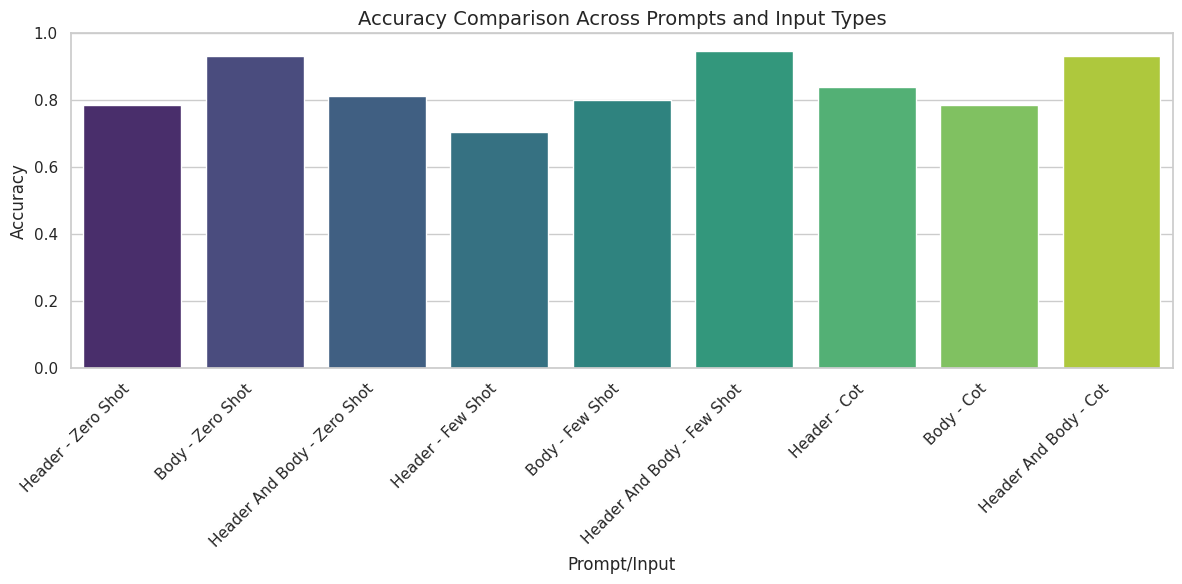

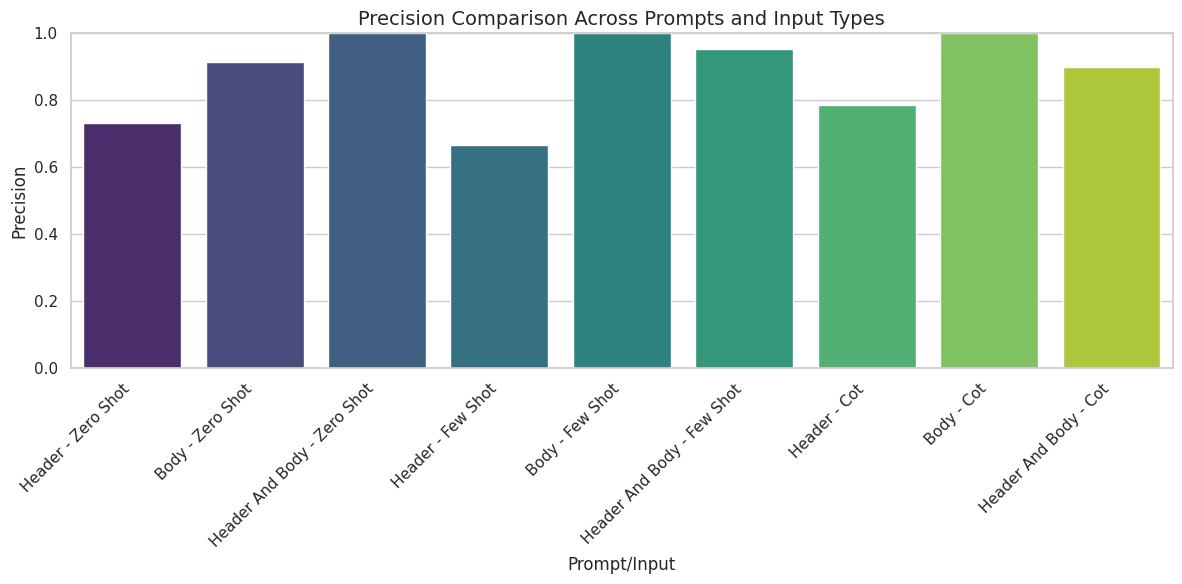

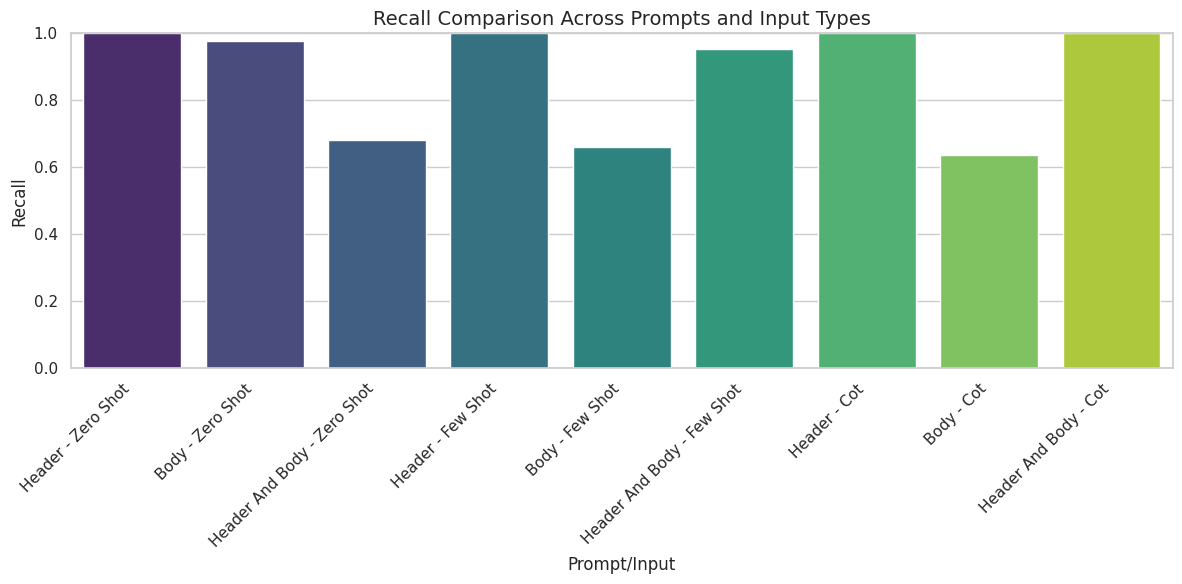

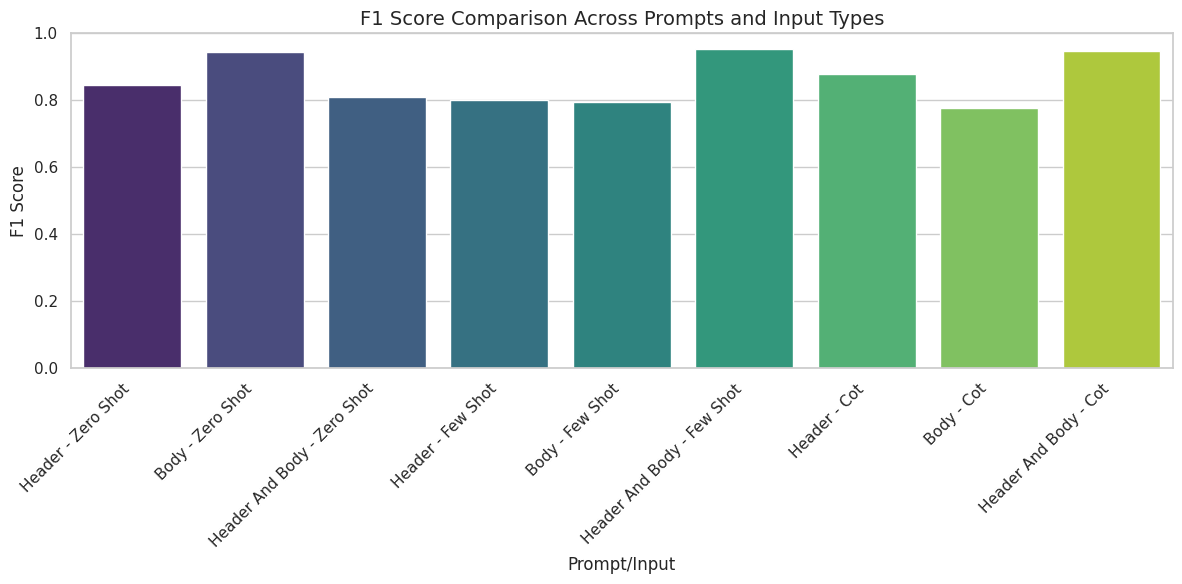

In [ ]:

#  Set a clean visual style for all Seaborn plots
sns.set(style="whitegrid")

# List of metrics you want to visualize across models/prompts
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

#  Loop through each metric to create a separate plot
for metric in metrics:
    #  Create a new figure and set its size
    plt.figure(figsize=(12, 6))

    #  Create a bar plot:
    # - x-axis: each prompt-input combo (e.g., Header - Few Shot)
    # - y-axis: value of the current metric (e.g., F1 Score)
    # - hue: same as x (used to color bars consistently without warning)
    # - palette: defines the color range
    # - legend=False: hides legend since it duplicates the x-axis labels
    sns.barplot(
        data=results_df,               # 👈 your evaluation results DataFrame
        x="Prompt/Input",              # 👈 column used for x-axis (combination label)
        y=metric,                      # 👈 column for y-axis (current metric)
        hue="Prompt/Input",            # 👈 hue same as x to avoid future warning
        palette="viridis",             # 👈 color palette
        legend=False                   # 👈 hide redundant legend
    )

    #  Add a title to the chart
    plt.title(f"{metric} Comparison Across Prompts and Input Types", fontsize=14)

    # Label the Y-axis
    plt.ylabel(metric)

    # Set consistent y-axis range for comparison
    plt.ylim(0, 1)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")

    # Ensure everything fits nicely in the layout
    plt.tight_layout()

    # Show the plot
    plt.show()


# Result Analysis and Best Model Reporting

In [ ]:
import pandas as pd
import os

# Rank the DataFrame by Accuracy in descending order (higher accuracy = better rank)
results_df['Rank'] = results_df['Accuracy'].rank(ascending=False, method='min').astype(int)

# Sort the DataFrame by Accuracy descending and then by Rank
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Display the ranked evaluation summary
print("\n🏆  gemini Ranked Summary by Accuracy:")
display(results_df_sorted)

# Save the ranked results to a new Excel file
ranked_excel_path = os.path.join(path, '001 Submission', 'All APIs', 'deepseek_llm', 'output_daata', 'ranked_evaluation_metrics_summary.xlsx')
results_df_sorted.to_excel(ranked_excel_path, index=False)

# Confirmation message
print(f"✅ Ranked metrics saved to Excel: {ranked_excel_path}")



🏆  gemini Ranked Summary by Accuracy:


,Prompt/Input,Accuracy,Precision,Recall,F1 Score,Rank
5,Header And Body - Few Shot,0.9467,0.9545,0.9545,0.9545,1
8,Header And Body - Cot,0.9333,0.8980,1.0000,0.9462,2
1,Body - Zero Shot,0.9333,0.9149,0.9773,0.9451,2
6,Header - Cot,0.8400,0.7857,1.0000,0.8800,4
2,Header And Body - Zero Shot,0.8133,1.0000,0.6818,0.8108,5
4,Body - Few Shot,0.8000,1.0000,0.6591,0.7945,6
0,Header - Zero Shot,0.7867,0.7333,1.0000,0.8462,7
7,Body - Cot,0.7867,1.0000,0.6364,0.7778,7
3,Header - Few Shot,0.7067,0.6667,1.0000,0.8000,9


✅ Ranked metrics saved to Excel: /content/drive/MyDrive/002 SP 25 Project/04 Manikanth and Anjireddy/001 Submission/All APIs/deepseek_llm/output_daata/ranked_evaluation_metrics_summary.xlsx


In [ ]:
# 📊 Analyze and highlight the best performing configuration

# Sort results by F1 Score and show the top-performing configuration
best = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]
print("\n🏆 Best Performing Configuration:")
print(best)



🏆 Best Performing Configuration:
Prompt/Input    Header And Body - Few Shot
Accuracy                            0.9467
Precision                           0.9545
Recall                              0.9545
F1 Score                            0.9545
Rank                                     1
Name: 5, dtype: object
